In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

california = fetch_california_housing()
X = california.data
y = california.target
feature_names = california.feature_names
X.shape

feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [3]:
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


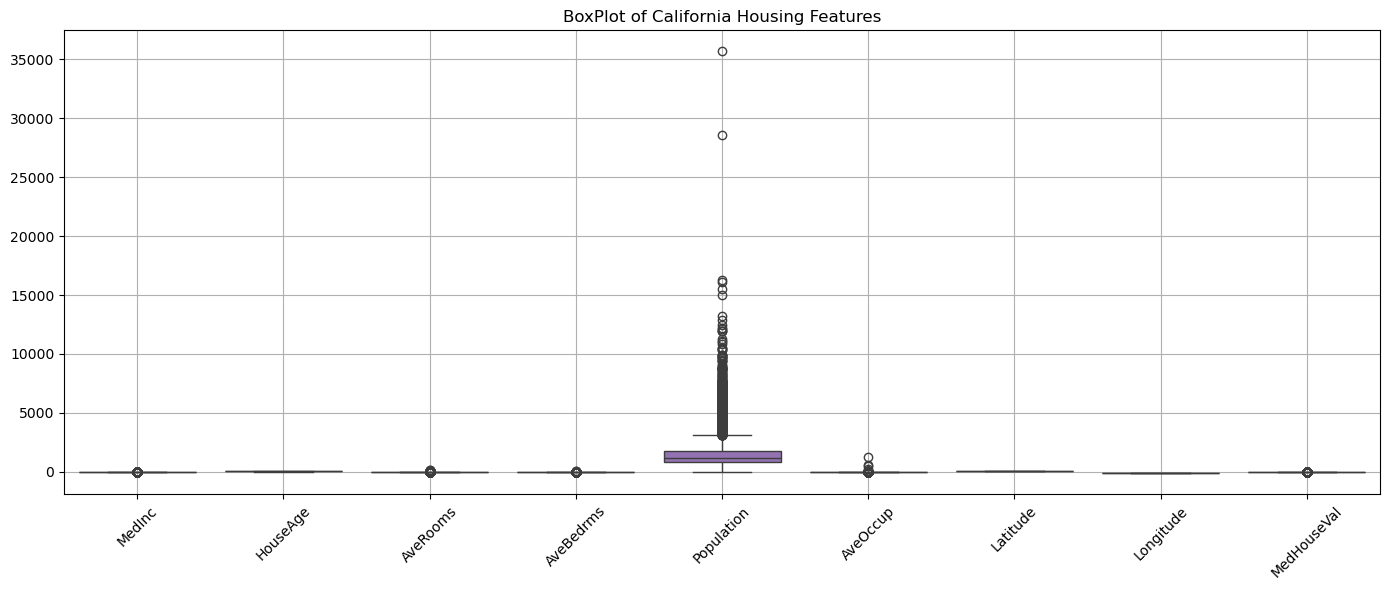

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_california_housing

plt.figure(figsize=(14, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("BoxPlot of California Housing Features")
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8))

In [6]:
import numpy as np

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

df_clean = df.copy()

# Handling Population Outliers
df_clean['Population'] = np.log1p(df_clean['Population'])

# Handling AveOccup Outliers
df_clean = remove_outliers_iqr(df_clean, 'AveOccup')
# df_clean = remove_outliers_iqr(df_clean, 'AveRooms')
# df_clean = remove_outliers_iqr(df_clean, 'AveBedrms')


df_clean.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,19929.000000,19929.000000,19929.000000,19929.000000,19929.000000,19929.000000,19929.000000,19929.000000,19929.000000
mean,3.903019,28.569321,5.460996,1.097407,7.019922,2.841571,35.663273,-119.596908,2.088878
std,1.905163,12.636260,2.491681,0.479919,0.724647,0.626707,2.146184,2.012730,1.159955
min,0.499900,1.000000,0.846154,0.333333,1.791759,1.161290,32.540000,-124.350000,0.149990
25%,2.586800,18.000000,4.479532,1.006173,6.665684,2.416216,33.940000,-121.820000,1.207000
50%,3.565200,29.000000,5.260649,1.048860,7.054450,2.793017,34.280000,-118.540000,1.830000
75%,4.794600,37.000000,6.081633,1.099379,7.441320,3.221258,37.730000,-118.010000,2.675000
max,15.000100,52.000000,141.909091,34.066667,9.699288,4.560748,41.950000,-114.310000,5.000010


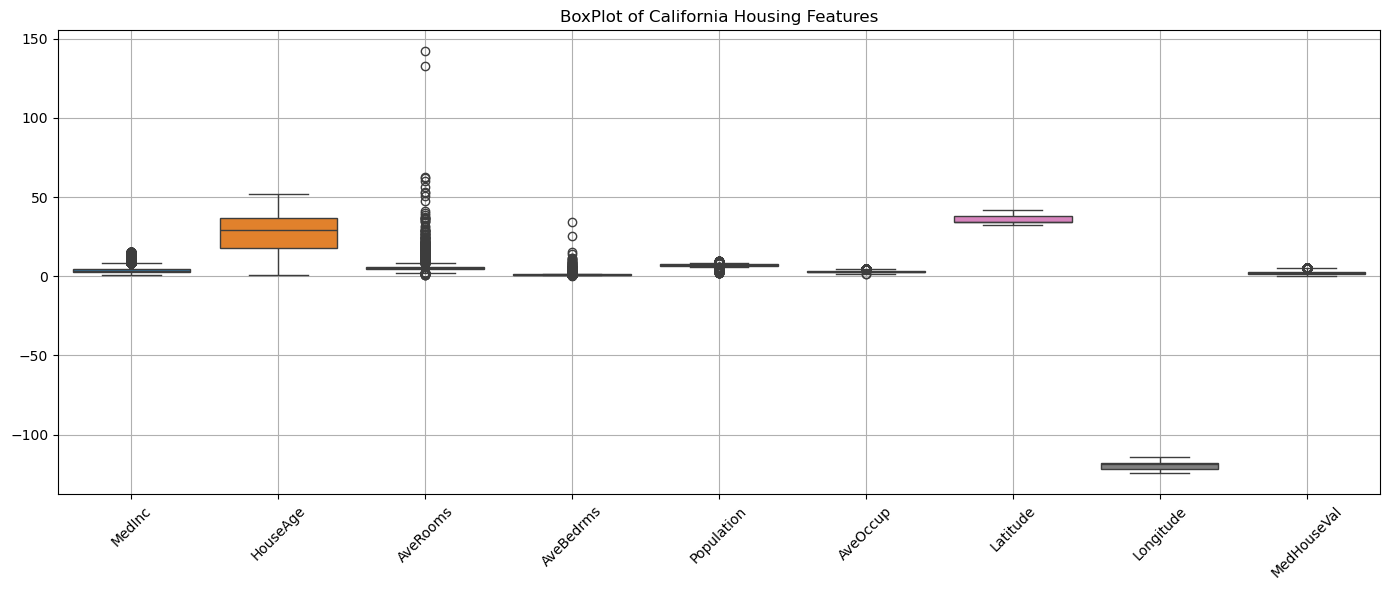

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_california_housing

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_clean)
plt.xticks(rotation=45)
plt.title("BoxPlot of California Housing Features")
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

non_geo_cols = df_clean.drop(columns=['Latitude', 'Longitude'])

scaler = StandardScaler()
X_scaled_part = scaler.fit_transform(non_geo_cols)

X_scaled_array = np.concatenate([X_scaled_part, df_clean[['Latitude', 'Longitude']].values], axis=1)

final_columns = list(non_geo_cols.columns) + ['Latitude', 'Longitude']
df_scaled = pd.DataFrame(X_scaled_array, columns=final_columns)
df_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal,Latitude,Longitude
0,2.321214,0.983756,0.611302,-0.153357,-1.714354,-0.456390,2.101101,37.88,-122.23
1,2.308721,-0.599031,0.311902,-0.261564,1.054520,-1.167607,1.289842,37.86,-122.22
2,1.760723,1.854288,1.134660,-0.049927,-1.119652,-0.062729,1.234666,37.85,-122.24
3,0.913373,1.854288,0.143022,-0.050734,-0.957418,-0.468534,1.141557,37.85,-122.25
4,-0.029825,1.854288,0.329448,-0.034019,-0.940244,-1.053316,1.149316,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
19924,-1.229699,-0.282474,-0.166776,0.074861,-0.385580,-0.448331,-1.127553,39.48,-121.09
19925,-0.706634,-0.836449,0.262095,0.455052,-1.576237,0.448762,-1.136174,39.49,-121.21
19926,-1.156370,-0.915588,-0.102525,0.047271,-0.143795,-0.823270,-1.005131,39.43,-121.22
19927,-1.068607,-0.836449,-0.052770,0.155265,-0.566597,-1.146277,-1.070653,39.43,-121.32


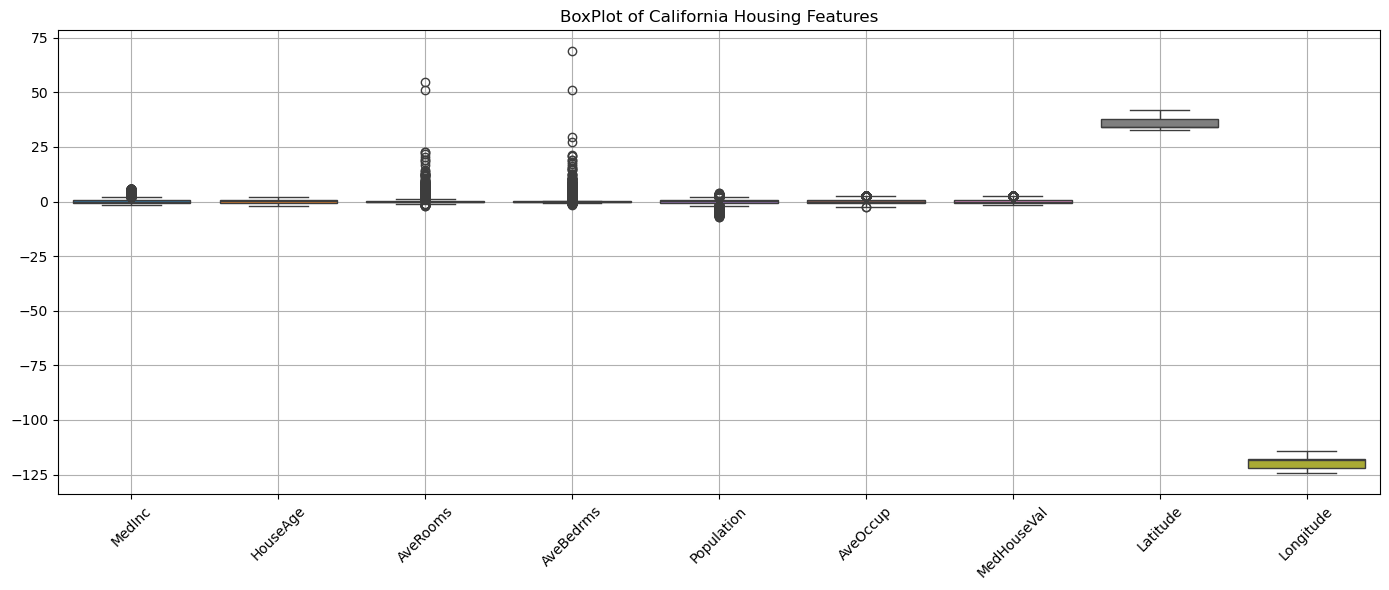

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_california_housing

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_scaled)
plt.xticks(rotation=45)
plt.title("BoxPlot of California Housing Features")
plt.grid(True)
plt.tight_layout()
plt.show()

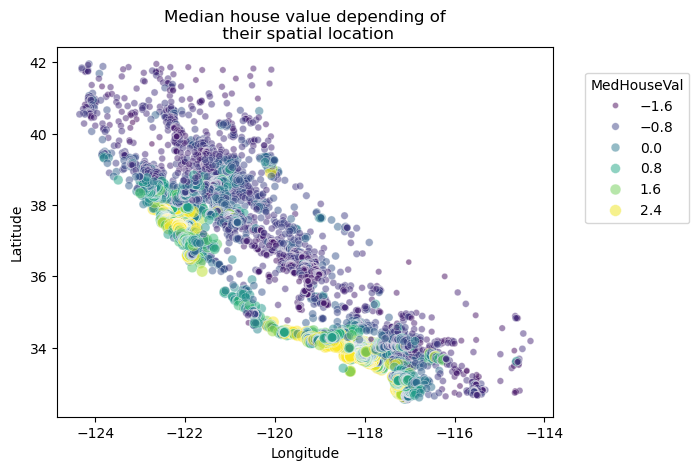

In [10]:
import seaborn as sns

sns.scatterplot(
    data=df_scaled,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

In [11]:
def map_location_to_region(lat, lon):
    if lat > 38:
        return 'North'
    elif lat < 33:
        return 'South'
    elif lon < -121:
        return 'West'
    else:
        return 'Central'

df_scaled['Region'] = df_scaled.apply(lambda row: map_location_to_region(row['Latitude'], row['Longitude']),
axis=1)
df_scaled = df_scaled.drop(["Latitude" , "Longitude"] , axis=1)
df_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal,Region
0,2.321214,0.983756,0.611302,-0.153357,-1.714354,-0.456390,2.101101,West
1,2.308721,-0.599031,0.311902,-0.261564,1.054520,-1.167607,1.289842,West
2,1.760723,1.854288,1.134660,-0.049927,-1.119652,-0.062729,1.234666,West
3,0.913373,1.854288,0.143022,-0.050734,-0.957418,-0.468534,1.141557,West
4,-0.029825,1.854288,0.329448,-0.034019,-0.940244,-1.053316,1.149316,West
...,...,...,...,...,...,...,...,...
19924,-1.229699,-0.282474,-0.166776,0.074861,-0.385580,-0.448331,-1.127553,North
19925,-0.706634,-0.836449,0.262095,0.455052,-1.576237,0.448762,-1.136174,North
19926,-1.156370,-0.915588,-0.102525,0.047271,-0.143795,-0.823270,-1.005131,North
19927,-1.068607,-0.836449,-0.052770,0.155265,-0.566597,-1.146277,-1.070653,North


In [12]:
# X_scaled = X_scaled.drop(["Longitude" , "Latitude"] , axis=1)
df_encoded = pd.get_dummies(df_scaled, columns=['Region'], drop_first=True, dtype=int)
df_encoded

df_encoded['RoomsPerHousehold'] = df_encoded['AveRooms'] / df_encoded['AveOccup']
df_encoded['BedroomsPerRoom'] = df_encoded['AveBedrms'] / df_encoded['AveRooms']
df_encoded['PopulationPerHousehold'] = df_encoded['Population'] / df_encoded['AveOccup']

df_encoded = df_encoded.drop(["AveOccup" , "Region_North"] , axis=1)

df_encoded


,MedInc,HouseAge,AveRooms,AveBedrms,Population,MedHouseVal,Region_South,Region_West,RoomsPerHousehold,BedroomsPerRoom,PopulationPerHousehold
0,2.321214,0.983756,0.611302,-0.153357,-1.714354,2.101101,0,1,-1.339429,-0.250870,3.756335
1,2.308721,-0.599031,0.311902,-0.261564,1.054520,1.289842,0,1,-0.267130,-0.838608,-0.903147
2,1.760723,1.854288,1.134660,-0.049927,-1.119652,1.234666,0,1,-18.088386,-0.044002,17.849130
3,0.913373,1.854288,0.143022,-0.050734,-0.957418,1.141557,0,1,-0.305254,-0.354727,2.043434
4,-0.029825,1.854288,0.329448,-0.034019,-0.940244,1.149316,0,1,-0.312772,-0.103259,0.892652
...,...,...,...,...,...,...,...,...,...,...,...
19924,-1.229699,-0.282474,-0.166776,0.074861,-0.385580,-1.127553,0,0,0.371992,-0.448875,0.860034
19925,-0.706634,-0.836449,0.262095,0.455052,-1.576237,-1.136174,0,0,0.584039,1.736212,-3.512409
19926,-1.156370,-0.915588,-0.102525,0.047271,-0.143795,-1.005131,0,0,0.124534,-0.461066,0.174664
19927,-1.068607,-0.836449,-0.052770,0.155265,-0.566597,-1.070653,0,0,0.046036,-2.942303,0.494294


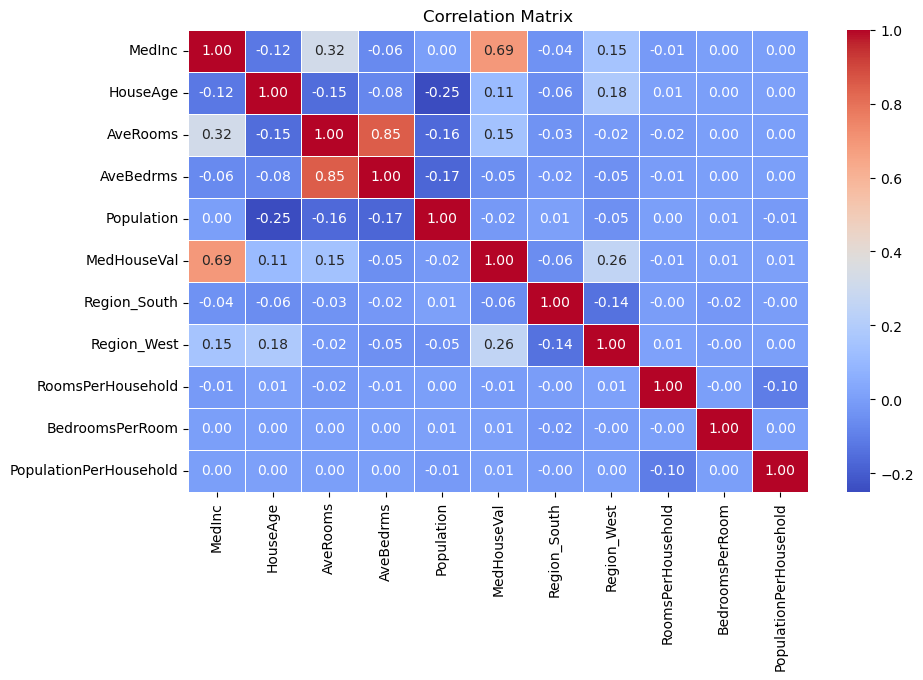

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths
=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
df_encoded = df_encoded.drop(["AveBedrms" ] , axis=1)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_encoded.drop(columns=['MedHouseVal'])
y = df_encoded['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

# پیش‌بینی روی داده آموزش و تست
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# محاسبه MSE و R2 روی هر دو مجموعه
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train Mean Squared Error: {mse_train:.2f}")
print(f"Train R^2 Score: {r2_train:.2f}")
print(f"Test Mean Squared Error: {mse_test:.2f}")
print(f"Test R^2 Score: {r2_test:.2f}")


Train Mean Squared Error: 0.46
Train R^2 Score: 0.53
Test Mean Squared Error: 0.50
Test R^2 Score: 0.54


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


NameError: name 'y_pred' is not defined

In [195]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# داده‌ها و هدف
X = df_encoded.drop(columns=['MedHouseVal'])
y = df_encoded['MedHouseVal']

# تقسیم داده به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# تعریف مدل Ridge
ridge = Ridge()

# تعریف بازه‌های آلفا برای جستجو
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 200, 500]}

# راه‌اندازی GridSearchCV
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')

# آموزش مدل با جستجوی بهترین آلفا
grid_search.fit(X_train, y_train)

# بهترین آلفا
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# مدل نهایی با بهترین آلفا
best_ridge = grid_search.best_estimator_

# پیش‌بینی روی داده‌های تست
y_pred_test = best_ridge.predict(X_test)

# ارزیابی مدل
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Test MSE: {test_mse:.4f}")
print(f"Test R^2: {test_r2:.4f}")




Best alpha: 100
Test MSE: 0.4747
Test R^2: 0.5602
